In [2]:
import pandas as pd
import sqlite3

connection = sqlite3.connect('../data/checking-logs.sqlite')

df = pd.io.sql.read_sql("SELECT uid, timestamp FROM checker WHERE uid LIKE 'user_%'",
                                connection, parse_dates=['timestamp'])
df['weekday'] = df['timestamp'].dt.dayofweek
df['day'] = df.timestamp.dt.day
df['hour'] = df.timestamp.dt.hour
df['type'] = df['weekday'].apply( lambda x: 'working_day' if x < 5 else 'weekend')
df = df.drop(columns = ['weekday'])
df

,uid,timestamp,day,hour,type
0,user_4,2020-04-17 05:19:02.744528,17,5,working_day
1,user_4,2020-04-17 05:22:35.249331,17,5,working_day
2,user_4,2020-04-17 05:22:45.549397,17,5,working_day
3,user_4,2020-04-17 05:34:14.691200,17,5,working_day
4,user_4,2020-04-17 05:34:24.422370,17,5,working_day
...,...,...,...,...,...
3202,user_1,2020-05-21 20:19:06.872761,21,20,working_day
3203,user_1,2020-05-21 20:22:41.785725,21,20,working_day
3204,user_1,2020-05-21 20:22:41.877806,21,20,working_day
3205,user_1,2020-05-21 20:37:00.129678,21,20,working_day


In [7]:
df2 = df.groupby(['type', 'day', 'hour']).count()
df2 = df2.groupby(['type', 'hour']).mean()['uid'].reset_index()
df2.head()

,type,hour,uid
0,weekend,0,2.0
1,weekend,1,6.0
2,weekend,3,1.0
3,weekend,5,2.0
4,weekend,7,4.0


In [9]:
df3 = pd.pivot(df2, values='uid', index='hour', columns='type')
df3.head()

type,weekend,working_day
hour,,
0,2.0,3.0
1,6.0,NaN
3,1.0,2.0
5,2.0,7.5
6,NaN,1.5


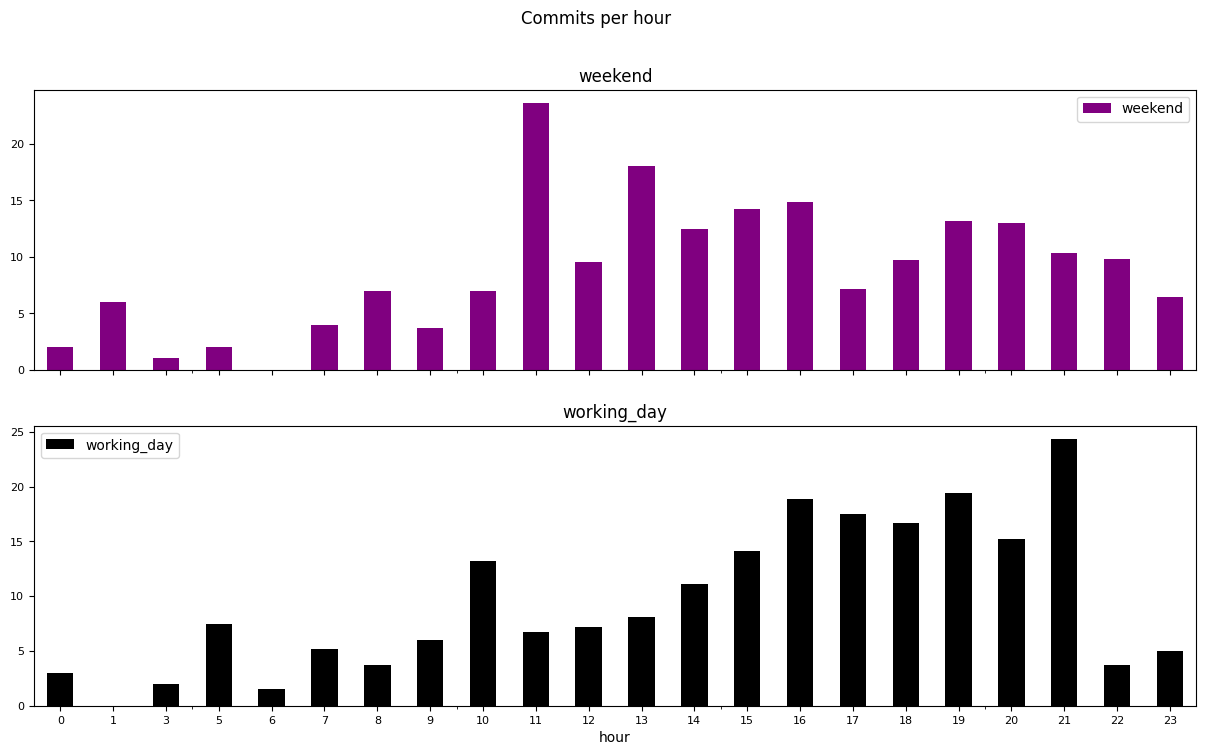

In [18]:
graph = df3.plot(kind='bar', fontsize=8, figsize=(15, 8), title='Commits per hour', subplots=True,
                    rot=0, color=['purple', 'black'])

In [19]:
connection.close()

Is the dynamic different on working days and weekends?
Yes, at 21 on working days and at 11 on the weekend.